## Preprocessing Open Street Map Data



1. Test osmgraph


In [3]:
import osmgraph

In [22]:
g = osmgraph.parse_file("hawaii-latest.osm.bz2")

In [8]:
len(g.node)

479428

In [7]:
#coding:utf-8
import networkx as nx
import matplotlib.pyplot as plt
#此段代码解决 1.matplotlib中文显示问题 2 '-'显示为方块问题
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False
def show(G,pos,title=None,photo_name='picture'):
    e_1 =[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] ==1] # 普通边
    e_2 =[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] ==0] # 利用的边
    # Draw nodes
    nx.draw_networkx_nodes(G,pos,node_size=300, node_color='orange')
    # Draw Edges
    nx.draw_networkx_edges(G,pos,edgelist=e_1,width=1, alpha = 1,edge_color='g',style='dashed')
    nx.draw_networkx_edges(G,pos,edgelist=e_2, width=3,alpha=0.6,edge_color='b')
    edge_labels =dict([((u, v), d['weight']) for u, v, d in G.edges(data=True)])
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    nx.draw_networkx_labels(G,pos,font_size=10)
    plt.title(title)
    plt.axis('off')
    plt.savefig(photo_name)
    plt.show()
    
#%% read in data - use a pandas dataframe just for convenience
import pandas as pd
data = pd.read_table("~/Desktop/Project/data/melbourne_graph.txt",
                     sep = " ",
                     header = None, 
                     names = ['vx', 'vy', 'weight'])

# %% use network x to prepare dictionary structure which can be fed in to the 
# dijkstra function
import networkx as nx
graph = nx.from_pandas_edgelist(data, 'vx', 'vy', 'weight')
# graph_nodes = graph.nodes()
graph_dict = nx.to_dict_of_dicts(graph)
G = nx.Graph(graph_dict)
pos = nx.shell_layout(G) 
#show(G,pos)
print data

          vx     vy      weight
0          0  34518    2.749072
1          1      5    2.271235
2          2   3671   86.808595
3          3  26417   17.445428
4          4   6405   11.750372
5          5  36409    2.271235
6          6  34417    2.744146
7          7  24471   25.488003
8          8  24463   11.642427
9          9      8   27.802402
10        10      9   26.473470
11        11  43281    7.978199
12        11  43283   13.185452
13        12     13    2.279162
14        13     14    2.298862
15        14  36410    2.298862
16        15  34203  113.206446
17        16  42308    2.247284
18        17    374  116.320309
19        18  38041   80.132765
20        19  14855   54.466769
21        20  36265   20.485185
22        21     29   35.473374
23        22  42966   85.179937
24        23  40074    4.033502
25        24  38881    1.771551
26        25  42378    6.308571
27        26  41653    2.306694
28        27  38342  227.193240
29        28   9055    4.909797
...     

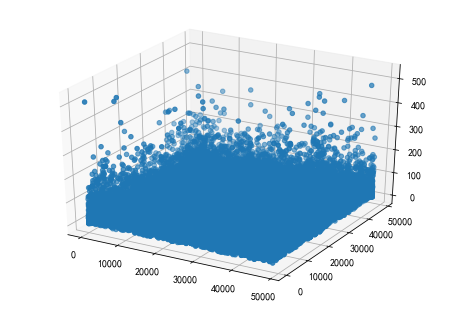

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(data['vx'], data['vy'], data['weight'],'b.')
#ax.scatter(class1[:,0], class1[:,1], class1[:,2],'r.')
plt.show()
